<a href="https://colab.research.google.com/github/yeahginny/Kaggle/blob/main/boston_regression_230718.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 베이스라인 모델

## 데이터 전처리

### 데이터 import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### 불필요한 데이터 제거

- 81 => 64 컬럼

In [ ]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
train_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

test_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

In [ ]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,EnclosedPorch,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,TA,Y,0,0,0,NaN,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,TA,TA,Y,0,0,0,NaN,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,TA,Y,0,0,0,NaN,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,TA,TA,Y,272,0,0,NaN,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,TA,Y,0,0,0,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,...,TA,TA,Y,0,0,0,NaN,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,...,TA,TA,Y,0,0,0,MnPrv,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,...,TA,TA,Y,0,0,0,GdPrv,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,...,TA,TA,Y,112,0,0,NaN,WD,Normal,142125


### 범주형 변수 더미화(컬럼 수가 달라 사용 x)

- 파이썬에서는 범주형 번수를 더미화 시켜야 학습을 할 수 있다.
- 원핫인코딩 사용
- 범주형 변수가 원핫인코딩되어 컬럼이 늘어남
- X = 1460 rows
- Y = 1459 rows
- 테스트 데이터는 뒤의 시점에 데이터인 경우가 많음.
- 양이 반반이다. 5:5 괜찮은가?
- 변수 일치가 안되어서(컬럼 수 다름) 원래 데이터로 모델링 진행하겠다.
- 추후 다른 요소로 분석하거나 전처리해서 분석해야함.

In [ ]:
#Train 데이터 범주형 변수 더미화
dummy_list = list(train_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(train_df[dummy_list], prefix = dummy_list)
train_df.drop(dummy_list, axis = 1, inplace = True)
X = pd.concat([train_df, dummies], axis = 1)

#Test 데이터 데이터 범주형 변수 더미화
dummy_list = list(test_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(test_df[dummy_list], prefix = dummy_list)
test_df.drop(dummy_list, axis = 1, inplace = True)
Y = pd.concat([test_df, dummies], axis = 1)

In [ ]:
X # 241 columns 범주의 개수가 더 많아서 원핫 인코딩의 차이가 있는 것 아닌가 싶음.

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
Y # 234 columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


### 결측치 처리

In [ ]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
FlrSF_1st          0
FlrSF_2nd          0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
EnclosedPorch      0
Porch_3Ssn         0
ScreenPorch        0
SalePrice          0
dtype: int64

In [ ]:
#Train 데이터 Missing 값 확인
cols=list(train_df)
for col in list(train_df):
    if (train_df[col].isnull().sum())==0:
        cols.remove(col)
    else:
        pass
print('Train데이터 결측치:', len(cols))
#3개

#Test 데이터 Missing 값 확인
cols=list(test_df)
for col in list(test_df):
    if (test_df[col].isnull().sum())==0:
        cols.remove(col)
    else:
        pass
print('Test데이터 결측치;', len(cols))
#7개

Train데이터 결측치: 3
Test데이터 결측치; 10


In [ ]:
#Train 데이터 Missing값 처리
for col in ('LotFrontage', 'MasVnrArea', 'GarageYrBlt'):
    train_df[col] = train_df[col].fillna(0)

#Test 데이터 Missing값 처리
for col in ('BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea'):
    test_df[col] = test_df[col].fillna(0)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF1     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  FlrSF_1st      1459 non-null   int64  
 13  FlrSF_2nd      1459 non-null   int64  
 14  GrLivArea      1459 non-null   int64  
 15  BsmtFullBath   1459 non-null   float64
 16  BsmtHalfBath   1459 non-null   float64
 17  FullBath       1459 non-null   int64  
 18  HalfBath

### 타겟과 데이터 분리

In [ ]:
data = train_df.drop('SalePrice', axis=1).values
target = train_df['SalePrice'].values

In [ ]:
data

array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 2.000e+01, 8.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 6.000e+01, 6.800e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.458e+03, 7.000e+01, 6.600e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.459e+03, 2.000e+01, 6.800e+01, ..., 1.120e+02, 0.000e+00,
        0.000e+00],
       [1.460e+03, 2.000e+01, 7.500e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
target

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

## 모델링

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# 성능이 일반 회귀보다 좋았던 라쏘 사용
Lasso = Lasso()
Lasso.fit(data, target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.963e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
predict = Lasso.predict(test_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [ ]:
# Lasso 베이스라인 모델 Export
result =pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predict
})
result.to_csv('result_Lasso.csv', index=False)

# 베이스라인 모델 외

## 데이터 전처리

### 데이터 improt

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

test_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

<ipython-input-4-47abe95fd841>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'], fit=norm, ax=ax1)
<ipython-input-4-47abe95fd841>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_df['SalePrice']), fit=norm, ax=ax2)


<Axes: xlabel='SalePrice', ylabel='Density'>

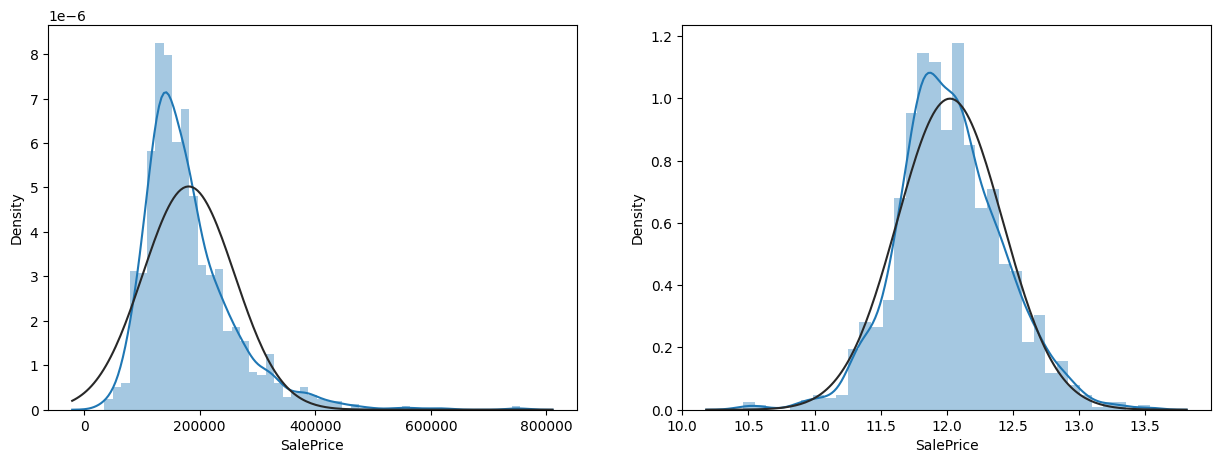

In [ ]:
#Target 변수 확인
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,5)
sns.distplot(train_df['SalePrice'], fit=norm, ax=ax1)
# 로그를 취해서 정규화
sns.distplot(np.log(train_df['SalePrice']), fit=norm, ax=ax2)

### 파생변수 만들기

### 1- 외부 컨디션

In [ ]:
# New_var1 생성

Condition_var = ['OverallQual','OverallCond','ExterQual','ExterCond']
Condition_Ex = train_df[Condition_var]

Condition_Ex = Condition_Ex.replace(to_replace='Ex',value = 5)
Condition_Ex = Condition_Ex.replace(to_replace='Gd',value = 4)
Condition_Ex = Condition_Ex.replace(to_replace='TA',value = 3)
Condition_Ex = Condition_Ex.replace(to_replace='Fa',value = 2)
Condition_Ex = Condition_Ex.replace(to_replace='Po',value = 1)

# 결측치는 0으로 대체
Condition_Ex = Condition_Ex.replace(to_replace='None',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='NA',value = 0)

In [ ]:
train_df['New_var1'] = Condition_Ex['OverallQual'] + Condition_Ex['OverallCond'] + Condition_Ex['ExterQual'] + Condition_Ex['ExterCond']

In [ ]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,EnclosedPorch,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice,New_var1
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,0,0,NaN,WD,Normal,208500,19
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,TA,Y,0,0,0,NaN,WD,Normal,181500,20
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,0,0,NaN,WD,Normal,223500,19
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,TA,Y,272,0,0,NaN,WD,Abnorml,140000,18
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,Y,0,0,0,NaN,WD,Normal,250000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,...,TA,Y,0,0,0,NaN,WD,Normal,175000,17
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,...,TA,Y,0,0,0,MnPrv,WD,Normal,210000,18
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,...,TA,Y,0,0,0,GdPrv,WD,Normal,266500,25
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,...,TA,Y,112,0,0,NaN,WD,Normal,142125,17


In [ ]:
Condition_var = ['OverallQual','OverallCond','ExterQual','ExterCond']
Condition_Ex = test_df[Condition_var]

Condition_Ex = Condition_Ex.replace(to_replace='Ex',value = 5)
Condition_Ex = Condition_Ex.replace(to_replace='Gd',value = 4)
Condition_Ex = Condition_Ex.replace(to_replace='TA',value = 3)
Condition_Ex = Condition_Ex.replace(to_replace='Fa',value = 2)
Condition_Ex = Condition_Ex.replace(to_replace='Po',value = 1)

# 결측치는 0으로 대체
Condition_Ex = Condition_Ex.replace(to_replace='None',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='NA',value = 0)

In [ ]:
test_df['New_var1'] = Condition_Ex['OverallQual'] + Condition_Ex['OverallCond'] + Condition_Ex['ExterQual'] + Condition_Ex['ExterCond']

In [ ]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,EnclosedPorch,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition,New_var1
0,1461,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,...,TA,TA,Y,0,0,120,MnPrv,WD,Normal,17
1,1462,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,...,TA,TA,Y,0,0,0,NaN,WD,Normal,18
2,1463,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,...,TA,TA,Y,0,0,0,MnPrv,WD,Normal,16
3,1464,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,...,TA,TA,Y,0,0,0,NaN,WD,Normal,18
4,1465,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,...,TA,TA,Y,0,0,144,NaN,WD,Normal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,...,NaN,NaN,Y,0,0,0,NaN,WD,Normal,17
1455,2916,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,...,TA,TA,Y,0,0,0,NaN,WD,Abnorml,15
1456,2917,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,...,TA,TA,Y,0,0,0,NaN,WD,Abnorml,18
1457,2918,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,...,NaN,NaN,Y,0,0,0,MnPrv,WD,Normal,16


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  Exterior

### 2 - 내부 면적
- 이상치 제거

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,EnclosedPorch,Porch_3Ssn,ScreenPorch,SalePrice,New_var1
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,6.517808,0.613014,1978.506164,1.767123,472.980137,21.954110,3.409589,15.060959,180921.195890,18.154110
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,1.625393,0.644666,24.689725,0.747315,213.804841,61.119149,29.317331,55.757415,79442.502883,2.149059
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,6.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,129975.000000,17.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,0.000000,0.000000,163000.000000,18.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,7.000000,1.000000,2002.000000,2.000000,576.000000,0.000000,0.000000,0.000000,214000.000000,19.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,14.000000,3.000000,2010.000000,4.000000,1418.000000,552.000000,508.000000,480.000000,755000.000000,29.000000


In [ ]:
# 어떤 조건을 이상치로 판단했는가?
train_df=train_df.drop(train_df[(train_df['TotalBsmtSF'] > 4000) | (train_df['FlrSF_1st'] > 300000) | (train_df['FlrSF_2nd'] > 1700) | (train_df['GrLivArea'] > 4000)].index)

In [ ]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,EnclosedPorch,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice,New_var1
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,0,0,NaN,WD,Normal,208500,19
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,TA,Y,0,0,0,NaN,WD,Normal,181500,20
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,0,0,NaN,WD,Normal,223500,19
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,TA,Y,272,0,0,NaN,WD,Abnorml,140000,18
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,Y,0,0,0,NaN,WD,Normal,250000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,...,TA,Y,0,0,0,NaN,WD,Normal,175000,17
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,...,TA,Y,0,0,0,MnPrv,WD,Normal,210000,18
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,...,TA,Y,0,0,0,GdPrv,WD,Normal,266500,25
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,...,TA,Y,112,0,0,NaN,WD,Normal,142125,17


In [ ]:
# New_var2 생성
train_df['New_var2'] = train_df['TotalBsmtSF'] + train_df['FlrSF_1st'] + train_df['FlrSF_2nd'] + train_df['GrLivArea']
test_df['New_var2'] = test_df['TotalBsmtSF'] + test_df['FlrSF_1st'] + test_df['FlrSF_2nd'] + test_df['GrLivArea']

### 3 - 욕실 개수

In [ ]:
# New_var3 생성
train_df['New_var3'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath']/2 + train_df['FullBath'] + train_df['HalfBath']/2
test_df['New_var3'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath']/2 + test_df['FullBath'] + test_df['HalfBath']/2

### 4 - 지하실 상태

In [ ]:
Under_Cond_var1 = ['BsmtQual','BsmtCond']
Under_Cond_Ex1 = train_df[Under_Cond_var1]

Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Ex',value = 5)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Gd',value = 4)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='TA',value = 3)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Fa',value = 2)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Po',value = 1)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='None',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='NA',value = 0)

Under_Cond_var2 = ['BsmtExposure','BsmtFinType1']
Under_Cond_Ex2 = train_df[Under_Cond_var2]

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Gd',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Av',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Mn',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='No',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='None',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='NA',value = 0)

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='GLQ',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='ALQ',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='BLQ',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Rec',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='LwQ',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Unf',value = 1)

train_df['New_var4'] = Under_Cond_Ex1['BsmtQual'] + Under_Cond_Ex1['BsmtCond'] +Under_Cond_Ex2['BsmtExposure'] + Under_Cond_Ex2['BsmtFinType1']

In [ ]:
Under_Cond_var1 = ['BsmtQual','BsmtCond']
Under_Cond_Ex1 = test_df[Under_Cond_var1]

Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Ex',value = 5)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Gd',value = 4)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='TA',value = 3)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Fa',value = 2)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Po',value = 1)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='None',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='NA',value = 0)

Under_Cond_var2 = ['BsmtExposure','BsmtFinType1']
Under_Cond_Ex2 = test_df[Under_Cond_var2]

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Gd',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Av',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Mn',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='No',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='None',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='NA',value = 0)

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='GLQ',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='ALQ',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='BLQ',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Rec',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='LwQ',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Unf',value = 1)

test_df['New_var4'] = Under_Cond_Ex1['BsmtQual'] + Under_Cond_Ex1['BsmtCond'] +Under_Cond_Ex2['BsmtExposure'] + Under_Cond_Ex2['BsmtFinType1']

### 5 - 부지 평탄도

In [ ]:
Land_var = ['LotShape','LandContour']
Land_Ex = train_df[Land_var]

Land_Ex = Land_Ex.replace(to_replace='IR1',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR2',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR3',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Reg',value = 1)

Land_Ex = Land_Ex.replace(to_replace='None',value = 0)
Land_Ex = Land_Ex.replace(to_replace='',value = 0)
Land_Ex = Land_Ex.replace(to_replace='NA',value = 0)

Land_Ex = Land_Ex.replace(to_replace='Bnk',value = 0)
Land_Ex = Land_Ex.replace(to_replace='HLS',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Low',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Lvl',value = 1)

train_df['New_var5'] = Land_Ex['LotShape'] + Land_Ex['LandContour']

In [ ]:
Land_var = ['LotShape','LandContour']
Land_Ex = test_df[Land_var]

Land_Ex = Land_Ex.replace(to_replace='IR1',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR2',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR3',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Reg',value = 1)

Land_Ex = Land_Ex.replace(to_replace='None',value = 0)
Land_Ex = Land_Ex.replace(to_replace='',value = 0)
Land_Ex = Land_Ex.replace(to_replace='NA',value = 0)

Land_Ex = Land_Ex.replace(to_replace='Bnk',value = 0)
Land_Ex = Land_Ex.replace(to_replace='HLS',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Low',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Lvl',value = 1)

test_df['New_var5'] = Land_Ex['LotShape'] + Land_Ex['LandContour']

### 6 - 차고 상태

In [ ]:
Garage_var = ['GarageFinish','GarageQual','GarageCond']
Garage_Ex = train_df[Garage_var]

Garage_Ex = Garage_Ex.replace(to_replace='Ex',value = 5)
Garage_Ex = Garage_Ex.replace(to_replace='Gd',value = 4)
Garage_Ex = Garage_Ex.replace(to_replace='TA',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='Fa',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Po',value = 1)
Garage_Ex = Garage_Ex.replace(to_replace='None',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='NA',value = 0)

Garage_Ex = Garage_Ex.replace(to_replace='Fin',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='RFn',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Unf',value = 1)

train_df['New_var6'] = Garage_Ex['GarageFinish'] + Garage_Ex['GarageQual'] + Garage_Ex['GarageCond']

In [ ]:
Garage_var = ['GarageFinish','GarageQual','GarageCond']
Garage_Ex = test_df[Garage_var]

Garage_Ex = Garage_Ex.replace(to_replace='Ex',value = 5)
Garage_Ex = Garage_Ex.replace(to_replace='Gd',value = 4)
Garage_Ex = Garage_Ex.replace(to_replace='TA',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='Fa',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Po',value = 1)
Garage_Ex = Garage_Ex.replace(to_replace='None',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='NA',value = 0)

Garage_Ex = Garage_Ex.replace(to_replace='Fin',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='RFn',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Unf',value = 1)

In [ ]:
test_df['New_var6'] = Garage_Ex['GarageFinish'] + Garage_Ex['GarageQual'] + Garage_Ex['GarageCond']

### 7 - 건축 연도
- 미래 시점을 기점으로 얼마나 지어졌는지

In [ ]:
train_df['New_var7'] = ((2020 - train_df['YearBuilt']) + (2020 - train_df['YearRemodAdd'])) / 2
test_df['New_var7'] = ((2020 - test_df['YearBuilt']) + (2020 - test_df['YearRemodAdd'])) / 2

###  Missing 및 NA값 처리

In [ ]:
# Train 파생변수 관련 변수 제외
train_df.drop(['OverallQual','OverallCond','ExterQual','ExterCond',
               'TotalBsmtSF','FlrSF_1st','FlrSF_2nd','GrLivArea',
               'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'LotShape','LandContour',
               'GarageFinish','GarageQual','GarageCond',
               'YearBuilt','YearRemodAdd','Electrical'], axis = 'columns', inplace=True)

In [ ]:
# Test 파생변수 관련 변수 제외
test_df.drop(['OverallQual','OverallCond','ExterQual','ExterCond',
               'TotalBsmtSF','FlrSF_1st','FlrSF_2nd','GrLivArea',
               'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'LotShape','LandContour',
               'GarageFinish','GarageQual','GarageCond',
               'YearBuilt','YearRemodAdd','Electrical'], axis = 'columns', inplace=True)

In [ ]:
for col in ('MasVnrType','FireplaceQu','GarageType','Fence'):
    train_df[col] = train_df[col].fillna('None')
,
for col in ('New_var1','New_var2','New_var3','New_var4','New_var5','New_var6','New_var7', 'LotFrontage','MasVnrArea','GarageYrBlt', 'BsmtFinSF1' ,'GarageCars', 'GarageArea', 'BsmtUnfSF'):
    train_df[col] = train_df[col].fillna(0)

for col in ('MSZoning', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional'):
    train_df[col] = train_df[col].fillna(test_df[col].mode()[0])

In [ ]:
for col in ('MasVnrType','FireplaceQu','GarageType','Fence'):
    test_df[col] = test_df[col].fillna('None')

for col in ('New_var1','New_var2','New_var3','New_var4','New_var5','New_var6','New_var7', 'LotFrontage','MasVnrArea','GarageYrBlt', 'BsmtFinSF1' ,'GarageCars', 'GarageArea', 'BsmtUnfSF'):
    test_df[col] = test_df[col].fillna(0)

for col in ('MSZoning', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional'):
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

### 범주형 변수 더미화

In [ ]:
dummy_list = list(train_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(train_df[dummy_list], prefix = dummy_list)
train_df.drop(dummy_list, axis = 1, inplace = True)
X = pd.concat([train_df, dummies], axis = 1)

dummy_list = list(test_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(test_df[dummy_list], prefix = dummy_list)
test_df.drop(dummy_list, axis = 1, inplace = True)
X = pd.concat([test_df, dummies], axis = 1)

## 모델링

### Lasso

In [ ]:
train_target = train_df['SalePrice']
train_df = train_df[list(test_df)]
train_target = np.log(train_target)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
Lasso = Lasso()
Lasso.fit(train_df, train_target)

Lasso()

In [ ]:
predict = Lasso.predict(test_df)
predict = np.exp(predict)
result =pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predict
})
result.to_csv('result_Lasso1.csv', index=False)

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [ ]:
GBoost = GradientBoostingRegressor()
GBoost.fit(train_df, train_target)

GradientBoostingRegressor()

In [ ]:
predict = GBoost.predict(test_df)
predict = np.exp(predict)
result =pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predict
})
result.to_csv('result_GBoost.csv', index=False)

### XGboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
XGB = XGBRegressor()
XGB.fit(train_df, train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predict = XGB.predict(test_df)
predict = np.exp(predict)
result = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predict
})
result.to_csv('result_XGB.csv', index=False)